In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [3]:
zip_file_path = 'Dutch_data_processed_onehot.zip'
csv_file_inside_zip = 'Dutch_data_processed_onehot.csv'

In [4]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [5]:
warnings.filterwarnings("ignore")

In [6]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692051,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692052,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692053,3,0,49,1,1,0,0,2022,12,4,...,1,0,0,0,0,0,1,1,0,0


# 4 labels: Car, Bike, Walk, Public Trasport

In [16]:
drops = ["Mode", "Arrival_area", "Year", "Motive_Tours/hiking", "Household_composition_Couple and kids","Household_composition_One person household","Education_Secondary"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [17]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Background_Western migration,Motive_Go to/return from work,Motive_Other,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Visits,Household_composition_Couple,Household_composition_Other,Education_Higher education,Education_Other
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,1,0,0,0,0
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,1,1,0
692051,3,0,49,1,1,0,0,12,4,0,...,0,0,0,1,0,0,0,1,1,0
692052,3,0,49,1,1,0,0,12,4,0,...,0,0,0,1,0,0,0,1,1,0
692053,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,1,0,0,1,1,0


In [18]:
X, y = shuffle(X, y, random_state=42)

In [19]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Background_Western migration,Motive_Go to/return from work,Motive_Other,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Visits,Household_composition_Couple,Household_composition_Other,Education_Higher education,Education_Other
450271,2,0,59,1,1,0,1,5,3,0,...,0,1,0,0,0,0,1,0,1,0
28807,2,1,82,1,1,0,0,4,2,0,...,0,0,0,0,0,1,1,0,0,1
74133,3,1,55,1,3,1,0,6,4,0,...,0,1,0,0,0,0,0,0,0,0
343899,2,0,62,1,1,0,0,8,1,0,...,1,0,1,0,0,0,1,0,1,0
655809,5,1,51,1,2,0,0,5,6,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,1,53,1,2,0,1,12,1,0,...,0,0,0,0,1,0,1,0,1,0
365838,2,1,42,1,0,0,0,9,4,0,...,1,1,0,0,0,0,1,0,1,0
131932,2,0,64,1,0,0,0,12,2,0,...,0,0,1,0,0,0,1,0,0,0
671155,4,1,40,1,1,0,0,12,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

In [21]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    285384
1    159141
2    156174
3     22150
Name: count, dtype: int64

Class counts in y_test:
Mode
0    31710
1    17682
2    17353
3     2461
Name: count, dtype: int64


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
base_classifier1 = RandomForestClassifier(random_state=42, max_features=4, n_estimators=550)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, n_estimators=550, subsample=0.9, colsample_bytree=0.9, learning_rate=1)
meta_classifier = LogisticRegression(C=1, max_iter=100)

stacking_classifier = StackingClassifier(
    estimators=[
        ('rf', base_classifier1),
        ('xgb', base_classifier2)
    ],
    final_estimator=meta_classifier,
    cv=10
)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     31710
           1       0.81      0.83      0.82     17682
           2       0.90      0.92      0.91     17353
           3       0.75      0.55      0.64      2461

    accuracy                           0.89     69206
   macro avg       0.85      0.81      0.82     69206
weighted avg       0.88      0.89      0.88     69206



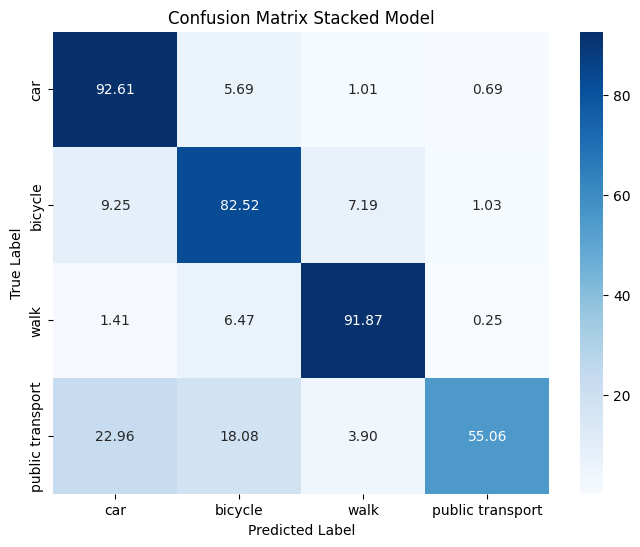

In [31]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()